<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>LGBMRegressor</a></span></li><li><span><a href="#DecisionTree" data-toc-modified-id="DecisionTree-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>DecisionTree</a></span></li><li><span><a href="#RandomForest" data-toc-modified-id="RandomForest-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>RandomForest</a></span></li></ul></li><li><span><a href="#Анализ-скорости-работы-и-качества-моделей" data-toc-modified-id="Анализ-скорости-работы-и-качества-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ скорости работы и качества моделей</a></span></li></ul></div>

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости.
Заказчику важны:
качество предсказания;
скорость предсказания;
время обучения.

## Загрузка и подготовка данных

In [1]:
conda install lightgbm

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from lightgbm import LGBMRegressor

In [3]:
# загружаем данные
try:
    df = pd.read_csv('/Users/dariasokolovska/Downloads/autos.csv')
except:
    df = pd.read_csv('/datasets/autos.csv')

In [4]:
# смотрим на датасет
df

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,2016-03-21 09:50:58,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21 00:00:00,0,2694,2016-03-21 10:42:49
354365,2016-03-14 17:48:27,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
354366,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
354367,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26


In [5]:
# изучаем даные
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [6]:
# приводим в порядок названия столбцов
df.columns = df.columns.str.lower()
df.rename(columns = {'datecrawled' : 'date_crawled',
                    'vehicletype' : 'vehicle_type',
                    'registrationyear' : 'registration_year',
                    'registrationmonth' : 'registration_month',
                    'fueltype' : 'fuel_type',
                    'notrepaired' : 'not_repaired',
                    'datecreated' : 'date_created',
                    'numberofpictures' : 'number_of_pictures',
                    'postalcode' : 'postal_code',
                    'lastseen' : 'last_seen'}, inplace = True)

In [7]:
# проверяем данные на наличие пропусков
df.isnull().sum()

date_crawled              0
price                     0
vehicle_type          37490
registration_year         0
gearbox               19833
power                     0
model                 19705
kilometer                 0
registration_month        0
fuel_type             32895
brand                     0
not_repaired          71154
date_created              0
number_of_pictures        0
postal_code               0
last_seen                 0
dtype: int64

В данных есть пропуски, необходимо подробнее их рассмотреть. 

In [8]:
voc = df[['vehicle_type', 'gearbox', 'fuel_type', 'model', 'brand']]
voc = voc.dropna()
voc = voc.drop_duplicates().reset_index(drop= True)
voc.query('brand == "jeep"')

,vehicle_type,gearbox,fuel_type,model,brand
0,suv,auto,gasoline,grand,jeep
372,suv,auto,petrol,grand,jeep
633,suv,manual,lpg,wrangler,jeep
743,suv,auto,petrol,cherokee,jeep
933,suv,manual,petrol,wrangler,jeep
934,suv,auto,gasoline,other,jeep
942,suv,manual,gasoline,cherokee,jeep
1097,suv,auto,lpg,grand,jeep
1104,suv,manual,gasoline,other,jeep
1282,suv,manual,lpg,other,jeep


Выше я создала "словарь", в котором выписаны все вариации сочетаний моделей, брендова, типа топлива, копобки передач, и типа авто. Из него становится понятно, что одна и та же модель и марка авто может иметь несколько вариаций топлива и коробки передач. По этому выполнять замену пропусков по такому словарю я считаю не целесообразным. Подберем значение для замены в каждом случае отдельно.

Столбец 'model' имеет значения 'прочее', именно ими заполню пропуски. Аналогично заполню столбец 'vehicle_type'. Столбец 'not_repaired' заполню значениями 'no', так как отсутствие данных о ремонте правильнее заменить значением отсутствующего ремонта.

In [9]:
df['model'] = df['model'].fillna('other')
df['not_repaired'] = df['not_repaired'].fillna('no')
df['vehicle_type'] = df['vehicle_type'].fillna('other')

Для столбцов 'gearbox' и 'fuel_type' выполню замену пропусков на самые часто встречаемые значения.

In [10]:
df['gearbox'].value_counts()
df['gearbox'] = df['gearbox'].fillna('manual')

In [11]:
df['fuel_type'].value_counts()
df['fuel_type'] = df['fuel_type'].fillna('petrol')

In [12]:
# проверяем на наличие дубликатов
df.duplicated().sum()

5

In [13]:
# удаляем дубликаты
df = df.drop_duplicates()

Выполняя подготовку данных к обучению, необходимо удалить столбцы, данные из которых не понадобятся для обучения. В нашем случае это столбцы с датами, количеством фото и почтовый индекс.

In [14]:
df = df.drop(['number_of_pictures', 'date_crawled', 'date_created', 'last_seen', 'postal_code'], axis=1)

Выполним проверку данных на выбросы

In [15]:
df.describe()

,price,registration_year,power,kilometer,registration_month
count,354364.000000,354364.000000,354364.000000,354364.000000,354364.000000
mean,4416.655608,2004.234471,110.093723,128211.373051,5.714641
std,4514.159690,90.228593,189.851590,37905.136957,3.726433
min,0.000000,1000.000000,0.000000,5000.000000,0.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000


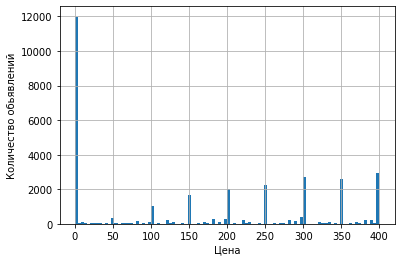

In [16]:
df['price'].hist(bins=100, range=(0, 400))
plt.xlabel('Цена')
plt.ylabel('Количество обьявлений')
plt.show()

In [17]:
df = df.query('price >= 100')

Изучив гистограмму, я приняла решение, что значения ниже 100 евро это выбросы, и их необходимо отбросить.

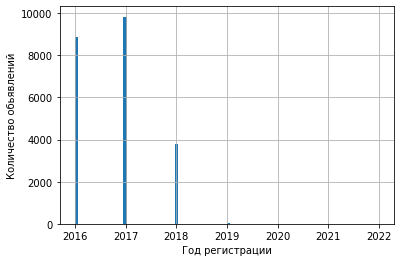

In [18]:
df['registration_year'].hist(bins=100, range=(2016, 2022))
plt.xlabel('Год регистрации')
plt.ylabel('Количество обьявлений')
plt.show()

In [19]:
df = df.query('registration_year >= 1960 & registration_year <= 2016')

Изучив гистограмму, я приняла решение, что значения ниже 1960 и выше 2016 года это выбросы, и их необходимо отбросит

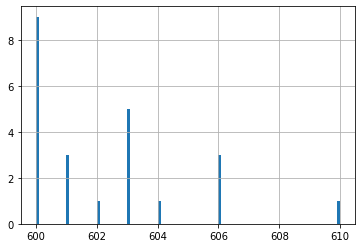

In [20]:
df['power'].hist(bins=100, range=(600, 610))
plt.show()

In [21]:
df = df.query('power >= 34 & power <= 600')

Изучив гистограмму и дополнительные материалы, я приняла решение, что значения ниже 34 л.с. и выше 600 л.с. это выбросы, и их необходимо отбросит

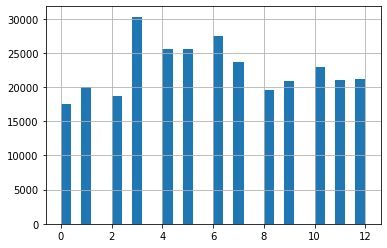

In [22]:
df['registration_month'].hist(bins=30)
plt.show()

In [23]:
df = df.query('registration_month != 0')

В данном столбце значения не могут быть 0, так как это обозначения месяца, и заменить их на любой другой мы не можем, я приняла решение удалить 0-е значения, так как это всего 6% значений

In [24]:
#КОД РЕВЬЮЕРА

df.describe()

,price,registration_year,power,kilometer,registration_month
count,276848.000000,276848.000000,276848.000000,276848.000000,276848.000000
mean,5030.192864,2003.052234,121.616504,128001.249783,6.382101
std,4650.853438,6.266217,53.753729,36649.000725,3.347366
min,100.000000,1960.000000,34.000000,5000.000000,1.000000
25%,1450.000000,1999.000000,80.000000,125000.000000,4.000000
50%,3400.000000,2003.000000,114.000000,150000.000000,6.000000
75%,7299.000000,2007.000000,150.000000,150000.000000,9.000000
max,20000.000000,2016.000000,600.000000,150000.000000,12.000000


Подготовим данные для обучения

In [25]:
# выделяем целевые признаки в выборках
target = df['price']
features= df.drop(['price'], axis = 1)

In [26]:
# разбиваем данные на тестовую и обучающую выборки
target_train, target_test, features_train, features_test = train_test_split(target, features, test_size=0.25, random_state=12345)

In [27]:
# вполняем кодирование категориальных значений в данных
enc = OrdinalEncoder()
enc.fit(features_test[['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']])
features_test[['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']] = enc.transform(features_test[['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']])
enc.fit(features_train[['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']])
features_train[['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']] = enc.transform(features_train[['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']])

/tmp/ipykernel_31/1633553815.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_test[['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']] = enc.transform(features_test[['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_31/1633553815.py:6: SettingWithCopyWarning: 


Вывод:
Изучив данные было выявлено несколько проблем: дубликаты, пропуски, выбросы. Данные были очищены, обработаны, и в итоге предобработаны для машинного обучения.    

## Обучение моделей

### LinearRegression

Обучаем модель LinearRegression и оцениваем качество 

In [28]:
model = LinearRegression()
scores =  cross_val_score(model, features_train, target_train, cv = 20, scoring = 'neg_root_mean_squared_error')
final_score = scores.mean()
print('RMSE =', final_score)

sMAPE =  -2948.614278575844


Вычислим скорость предсказания

In [29]:
%%time
model.fit(features_train, target_train)

CPU times: user 86.7 ms, sys: 42.3 ms, total: 129 ms
Wall time: 193 ms


LinearRegression()

In [30]:
%%time
model.predict(features_test)

CPU times: user 26.6 ms, sys: 845 µs, total: 27.5 ms
Wall time: 7 ms


array([2554.50147061, 7449.05755705, 7439.62292175, ..., 4272.26427132,
       1114.66999916, 3922.70373914])

### LGBMRegressor

Обучаем модель LGBMRegressor и оцениваем качество 

In [39]:
model = LGBMRegressor()
parametrs = {'max_depth': range (5, 15, 1),'n_estimators': range (35, 45, 1)}
grid = GridSearchCV(model, parametrs, cv = 20, scoring = 'neg_root_mean_squared_error')
grid.fit(features_train, target_train)
grid.best_params_

{'max_depth': 10, 'n_estimators': 44}

Вычислим скорость предсказания

In [51]:
model = LGBMRegressor(random_state = 12345, max_depth = 10, n_estimators = 44)

In [45]:
%%time
model.fit(features_train, target_train)

CPU times: user 28.3 s, sys: 171 ms, total: 28.5 s
Wall time: 28.7 s


LGBMRegressor(learning_rate=0.2, n_estimators=1000, random_state=12345)

In [46]:
%%time
prediction = model.predict(features_test)

CPU times: user 5.92 s, sys: 10.1 ms, total: 5.93 s
Wall time: 5.92 s


In [47]:
print('RMSE =', mean_squared_error(target_test, prediction)**0.5)

RMSE = 1510.8244361100071


In [44]:
model = LGBMRegressor(random_state = 12345, learning_rate=0.2, n_estimators=1000)

### DecisionTree

Подбираем гиперпараметры для модели DecisionTree, обучаем модель и оцениваем качество

In [32]:
model = DecisionTreeRegressor()
parametrs = {'max_depth': range (5, 20, 1),'min_samples_leaf': range (5, 15, 1)}
grid = GridSearchCV(model, parametrs, cv = 20, scoring = 'neg_root_mean_squared_error')
grid.fit(features_train, target_train)
grid.best_params_

{'max_depth': 19, 'min_samples_leaf': 9}

In [55]:
model = DecisionTreeRegressor(random_state = 12345, max_depth = 19, min_samples_leaf = 9)

In [56]:
%%time
model.fit(features_train, target_train)

CPU times: user 605 ms, sys: 3.98 ms, total: 609 ms
Wall time: 607 ms


DecisionTreeRegressor(max_depth=19, min_samples_leaf=9, random_state=12345)

In [59]:
%%time
prediction = model.predict(features_test)

CPU times: user 20 ms, sys: 17 µs, total: 20 ms
Wall time: 18.4 ms


In [60]:
print('RMSE =', mean_squared_error(prediction, target_test)**0.5)

RMSE = 1840.5268072454803


### RandomForest

Подбираем гиперпараметры для модели RandomForest, обучаем модель и оцениваем качество

In [33]:
model = RandomForestRegressor()
parametrs = {'n_estimators': range (1, 10, 1), 'min_samples_leaf': range (15, 25, 1)}
grid = GridSearchCV(model, parametrs, cv = 20, scoring = 'neg_root_mean_squared_error')
grid.fit(features_train, target_train)
grid.best_params_

{'min_samples_leaf': 15, 'n_estimators': 9}

In [36]:
model = RandomForestRegressor(random_state = 12345, n_estimators = 9, min_samples_leaf = 15)

In [37]:
%%time
model.fit(features_train, target_train)

CPU times: user 3.48 s, sys: 5.63 ms, total: 3.48 s
Wall time: 3.48 s


RandomForestRegressor(min_samples_leaf=15, n_estimators=9, random_state=12345)

In [38]:
%%time
prediction = model.predict(features_test)

CPU times: user 101 ms, sys: 3.8 ms, total: 105 ms
Wall time: 111 ms


In [39]:
print('RMSE =', mean_squared_error(prediction, target_test)**0.5)

RMSE = 1677.9848841774717


## Анализ скорости работы и качества моделей

In [65]:
data = [['128 ms.', '27.5 ms.', 2949],
        ['2.21 s.', '240 ms.', 1847],
        ['609 ms.', '20 ms.', 1840],
        ['3.57 s.', '108 ms.', 1726]]
model = ['LinearRegression', 'LGBMRegressor', 'DecisionTree', 'RandomForest']

pd.DataFrame(data = data, index = model, columns = ['fit_time', 'predict_time', 'RMSE'])

,fit_time,predict_time,RMSE
LinearRegression,128 ms.,27.5 ms.,2949
LGBMRegressor,2.21 s.,240 ms.,1847
DecisionTree,609 ms.,20 ms.,1840
RandomForest,3.57 s.,108 ms.,1726


По итогу обучения моделей мы получили данные, о качестве моделей, скорости предсказаний и времени обучения. Проанализировав полученные данные я могу рекомендавать заказчику использовать модель RandomForest для определения стоимости авто, так как она показывает не первый, но и не последний по скорости результат, и первый по качеству, что делает ее оптимальной среди всех моделей.